<a href="https://colab.research.google.com/github/singularis/machine_learning_learning/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [53]:
clusters = 10

## Importing the dataset

In [54]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 4 - Clustering/Section 24 - K-Means Clustering/Python/Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values

## Using the elbow method to find the optimal number of clusters

<function matplotlib.pyplot.show(close=None, block=None)>

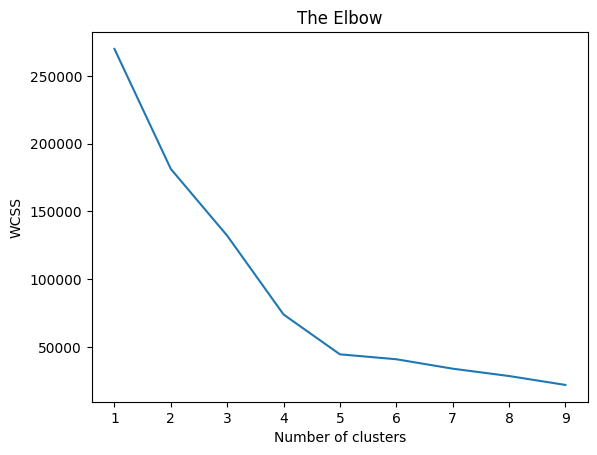

In [55]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,clusters):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,clusters), wcss)
plt.title("The Elbow")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show

## Training the K-Means model on the dataset

In [56]:
kmeans = KMeans(n_clusters=clusters, init='k-means++', random_state=42, n_init='auto')
y_kmeans=kmeans.fit_predict(X)

## Visualising the clusters

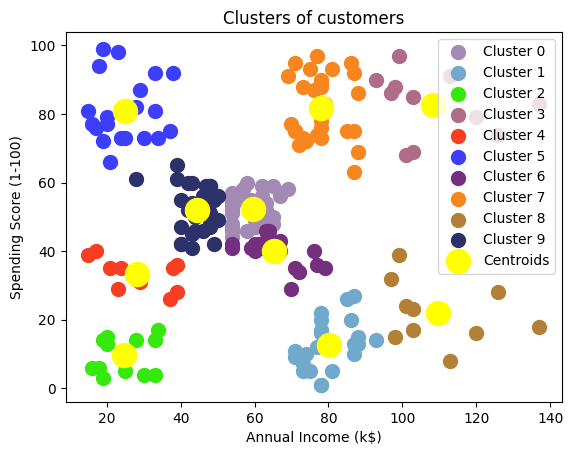

In [59]:
for cluster in range(0,clusters):
  color = random.randrange(0, 2**24)
  hex_color = hex(color)
  std_color = "#" + hex_color[2:]
  plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s = 100, c = std_color, label = f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()